<a href="https://colab.research.google.com/github/Rajalakshmi2025/OIBSIP_DataScience_Task3/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
df = pd.read_csv("/content/car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Cleaning

In [ ]:
# Check for missing values
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# View data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


#Exploratory Data Analysis (EDA)

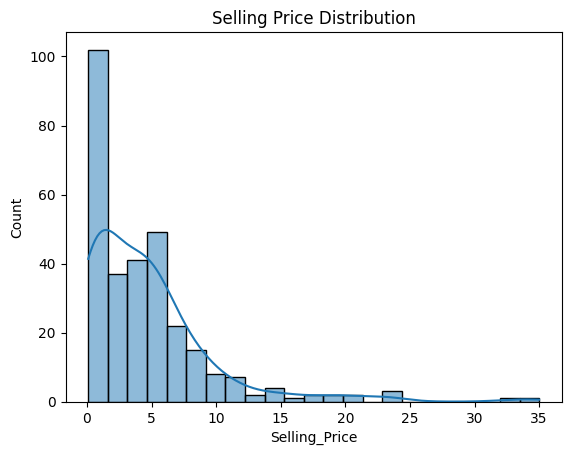

In [ ]:
# Distribution of target variable
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Selling Price Distribution")
plt.show()

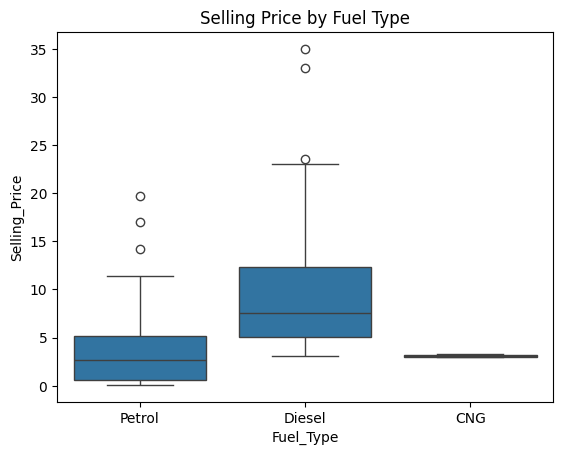

In [ ]:
# Boxplot for price vs fuel type
sns.boxplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.title("Selling Price by Fuel Type")
plt.show()

# Data Preprocessing

In [ ]:
# Encode categorical columns
label = LabelEncoder()
df['Fuel_Type'] = label.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label.fit_transform(df['Selling_type'])
df['Transmission'] = label.fit_transform(df['Transmission'])
df['Owner'] = label.fit_transform(df['Owner'])

# Drop car name or irrelevant columns
df.drop(['Car_Name'], axis=1, inplace=True)


# Model Building

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
# Load your dataset
df.columns = df.columns.str.strip().str.lower()  # clean column names

# Preview columns
print(df.columns)

# Example cleanup: drop 'name' column if it exists
if 'car_name' in df.columns:
    df.drop('car_name', axis=1, inplace=True)

# Label Encoding for categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define X and y
target_column = 'selling_price'  # change if your column is named differently
X = df.drop(target_column, axis=1)
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['year', 'selling_price', 'present_price', 'driven_kms', 'fuel_type',
       'selling_type', 'transmission', 'owner'],
      dtype='object')


## Model 1 – Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("MSE:", mse_lr)
print("RMSE:", mse_lr**0.5)

🔹 Linear Regression:
R² Score: 0.7479122055580626
MAE: 1.529178290660908
MSE: 6.497124829173706
RMSE: 2.548945827037857


## Model 2 – Random Forest Regressor



In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔸 Random Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RMSE:", mse_rf**0.5)


🔸 Random Forest Regressor:
R² Score: 0.5777582376649941
MAE: 1.3985350000000005
RMSE: 3.2988706646113513


Visualization – Actual vs Predicted Prices

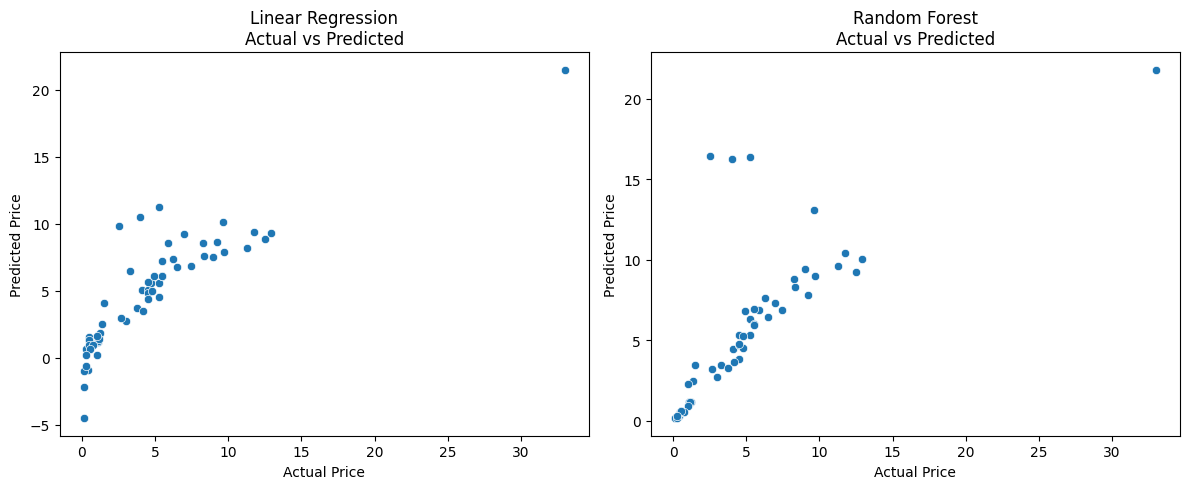

In [ ]:
# Compare predictions visually
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.title("Linear Regression\nActual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title("Random Forest\nActual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()


## Random Forest Feature Importance

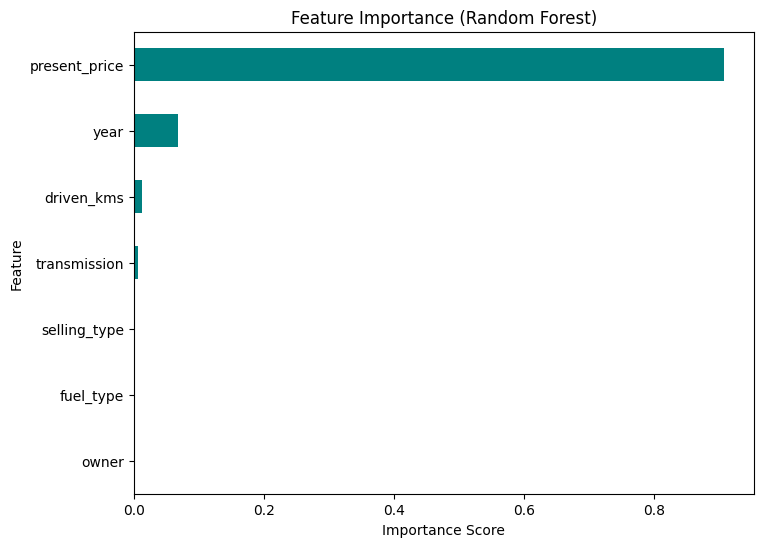

In [ ]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(8,6), color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
